In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
# Configure visualisations
#%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
sns.set(color_codes=True) # Set style and color of graphs

import pandas as pd
f1 = pd.read_csv("/Users/houzhuo/Downloads/data/02_01/02_01.csv")
f2 = pd.read_csv("/Users/houzhuo/Downloads/data/02_02/02_02.csv")
f3 = pd.read_csv("/Users/houzhuo/Downloads/data/05_01/05_01.csv")
f4 = pd.read_csv("/Users/houzhuo/Downloads/data/06_01/06_01.csv")
f5 = pd.read_csv("/Users/houzhuo/Downloads/data/07_01/07_01.csv")
f6 = pd.read_csv("/Users/houzhuo/Downloads/data/07_02/07_02.csv")
f7 = pd.read_csv("/Users/houzhuo/Downloads/data/07_03/07_03.csv")
f8 = pd.read_csv("/Users/houzhuo/Downloads/data/07_04/07_04.csv")
cap = pd.concat([f1,f2,f3,f4,f5,f6,f7,f8],axis=0)
t1 = pd.read_csv("/Users/houzhuo/Downloads/data/02_01/test3.csv")
t2 = pd.read_csv("/Users/houzhuo/Downloads/data/02_02/test3.csv")
t3 = pd.read_csv("/Users/houzhuo/Downloads/data/05_01/test3.csv")
t4 = pd.read_csv("/Users/houzhuo/Downloads/data/06_01/test3.csv")
t5 = pd.read_csv("/Users/houzhuo/Downloads/data/07_01/test3.csv")
t6 = pd.read_csv("/Users/houzhuo/Downloads/data/07_02/test3.csv")
t7 = pd.read_csv("/Users/houzhuo/Downloads/data/07_03/test3.csv")
t8 = pd.read_csv("/Users/houzhuo/Downloads/data/07_04/test3.csv")
rob = pd.concat([t1,t2,t3,t4,t5,t6,t7,t8],axis=0)
full = pd.concat([cap,rob],axis=1)
print(full.shape,cap.shape,rob.shape)
full.head()

/Users/houzhuo/Documents/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(1521, 44) (1521, 18) (1521, 26)


,1,2,3,4,5,6,7,8,9,10,...,Shoulder_L,Hip_R,Shoulder_R,Hip_u_L,Head,Hip_u_R,Head_u,Shoulder_pitch_L,Head_pitch,Shoulder_pitch_R
0,32.170,31.226,54.610,-12.289,37.270,-19.412,-15.922,-2.2978,-0.32138,-9.8953,...,-2196.000000,0,2243.000000,0,0,0,0,-254.000000,0,-631.000000
1,33.935,34.161,56.665,-12.488,39.463,-19.987,-17.261,-2.5077,-0.40396,-10.5590,...,-2196.736842,0,2240.684211,0,0,0,0,-240.421053,0,-597.947368
2,32.961,31.564,54.746,-11.809,36.489,-19.046,-16.506,-2.3873,-0.34868,-10.0670,...,-2197.473684,0,2238.368421,0,0,0,0,-226.842105,0,-564.894737
3,32.990,30.708,55.468,-11.346,35.372,-18.598,-16.070,-2.3202,-0.32733,-10.2220,...,-2198.210526,0,2236.052632,0,0,0,0,-213.263158,0,-531.842105
4,33.070,29.764,57.020,-10.839,34.338,-18.141,-15.418,-2.2212,-0.30061,-10.4740,...,-2198.947368,0,2233.736842,0,0,0,0,-199.684211,0,-498.789474


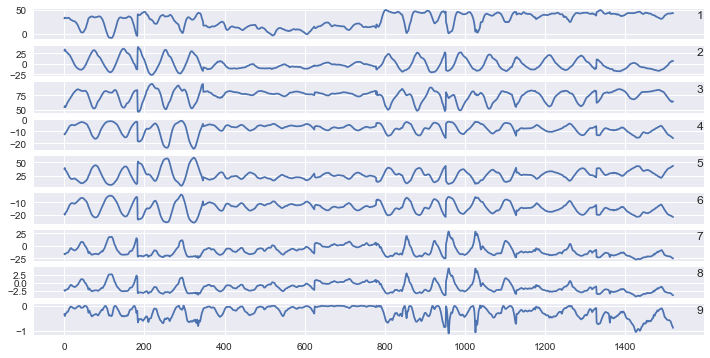

In [100]:
dataset = pd.concat([full['1'],full['2'],full['3'],full['4'],full['5'],full['6'],full['7'],full['8'],full['9'],full['Elbow_R']] , axis=1 )
dataset.head()
type(dataset)
import matplotlib.pyplot as plt
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3,4,5,6,7,8]
i=1
plt.figure(figsize=(12,6))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [102]:
from sklearn import preprocessing
values = dataset.values
#values = dataset.astype(np.float32)
n_features=9
#for i in range(4):
#    scaled[:,i] =values[:,i] - np.mean(values[:,i], axis = 0)

min_max_scaler = preprocessing.MinMaxScaler()
scaled = min_max_scaler.fit_transform(values)


train = scaled[:900,:]
val = scaled[900:1200,:]
test = scaled[1200:,:]




n_obs = n_features
train_X,train_y = train[:,:n_obs],train[:,-1]
val_X,val_y = val[:,:n_obs],val[:,-1]#第一个多少行
test_X,test_y = test[:,:n_obs],test[:,-1]
print(train_X.shape,train_y.shape)

(900, 9) (900,)


In [103]:
train_y

array([0.65801887, 0.65716547, 0.65631207, 0.65545866, 0.65460526,
       0.65375186, 0.65289846, 0.65204506, 0.65119166, 0.65033826,
       0.64948486, 0.64863145, 0.64777805, 0.64692465, 0.64607125,
       0.64521785, 0.64436445, 0.64351105, 0.64265765, 0.64180425,
       0.64095084, 0.64009744, 0.63924404, 0.63839064, 0.63753724,
       0.63668384, 0.63583044, 0.63497704, 0.63412363, 0.63327023,
       0.63241683, 0.63156343, 0.63071003, 0.62985663, 0.62900323,
       0.62814983, 0.62729643, 0.62644302, 0.62558962, 0.62661444,
       0.62763926, 0.62866408, 0.6296889 , 0.63071372, 0.63173854,
       0.63276336, 0.63378819, 0.63481301, 0.63583783, 0.63686265,
       0.63788747, 0.63891229, 0.63993711, 0.64096193, 0.64198675,
       0.64301157, 0.64403639, 0.64506121, 0.64608603, 0.64711085,
       0.64813567, 0.64916049, 0.65018531, 0.65121013, 0.65223495,
       0.65325977, 0.65428459, 0.65530941, 0.65633423, 0.65735905,
       0.65838387, 0.65940869, 0.66043351, 0.66145833, 0.66248

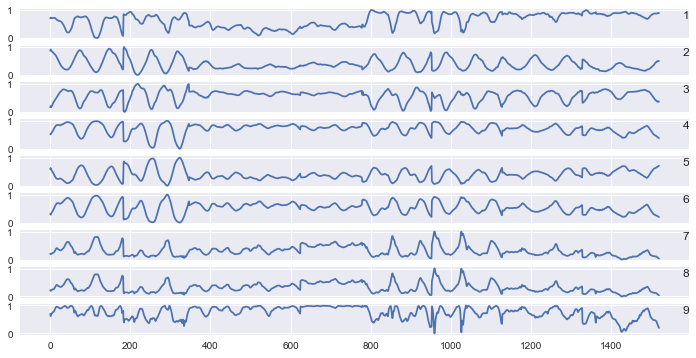

In [104]:
values
groups = [0, 1, 2, 3,4,5,6,7,8]
i=1
plt.figure(figsize=(12,6))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(scaled[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [105]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
#from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn import model_selection


In [106]:
rf = RandomForestRegressor(n_estimators=190, 
                           max_features= 'sqrt',verbose= 0 )
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
gbm = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2000,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
'''
lgb = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
'''

"\nlgb = LGBMRegressor(objective='regression',num_leaves=5,\n                              learning_rate=0.05, n_estimators=720,\n                              max_bin = 55, bagging_fraction = 0.8,\n                              bagging_freq = 5, feature_fraction = 0.2319,\n                              feature_fraction_seed=9, bagging_seed=9,\n                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)\n"

In [112]:
print('5-fold cross validation:\n')
stack = StackingCVRegressor(regressors=(rf,xgb,ENet, KRR, gbm), 
                          meta_regressor=ENet)
for clf, label in zip([rf,xgb, ENet, KRR, gbm,  stack], 
                      ['rf',
                       'XGBRegressor', 
                       'ENet', 
                       'KRR',
                       'gbm',
                       
                       'stack']):
    n_folds = 5
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_X)
    scores = np.sqrt(-model_selection.cross_val_score(clf, train_X, train_y, 
                                              cv=kf,scoring='neg_mean_squared_error'))
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" 
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

Accuracy: 0.1447 (+/- 0.0201) [rf]
Accuracy: 0.1503 (+/- 0.0256) [XGBRegressor]
Accuracy: 0.1571 (+/- 0.0386) [ENet]
Accuracy: 0.1522 (+/- 0.0359) [KRR]
Accuracy: 0.1580 (+/- 0.0205) [gbm]
Accuracy: 0.1493 (+/- 0.0182) [stack]


In [113]:

#Validation function
n_folds = 5
#def rmsle_cv(model):
kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_X)
score= np.sqrt(-cross_val_score(stack, train_X, train_y, scoring="neg_mean_squared_error", cv = kf))
#return(rmse)
#score = rmsle_cv(lasso)
print("\n stack score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


 stack score: 0.1499 (0.0187)



In [27]:
sclf.fit(train_X,train_y)


NameError: name 'sclf' is not defined

In [114]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))
stack.fit(train_X, train_y)
#sclf_pred = sclf.predict(X_train.values)
stack_train_pred = stack.predict(train_X)
stack_pred = stack.predict(val_X)
print(rmsle(train_y, stack_train_pred))

0.022647584228800186


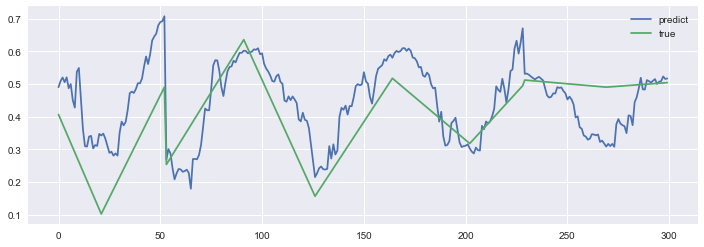

In [115]:
plt.figure()
plt.plot(stack_pred, label = 'predict')
plt.plot(val_y, label = 'true')
plt.legend()
plt.show()